In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

### Test dataset

- circle
- moon

In [5]:
circle = pd.read_csv('circle.txt', names=['x','y'])
moon = pd.read_csv('moon.txt', names=['x','y'])
circle.shape, moon.shape

((1500, 2), (1500, 2))

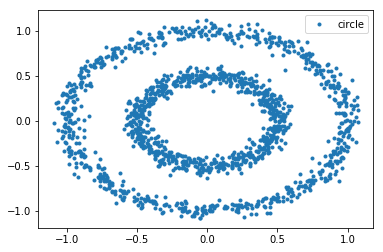

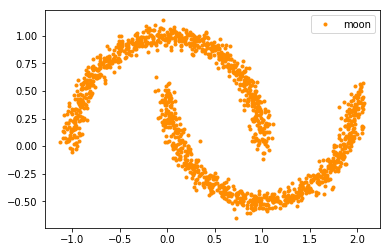

In [12]:
plt.plot(circle['x'], circle['y'],'.',label='circle')
plt.legend()
plt.show()
plt.plot(moon['x'], moon['y'],'.',c='darkorange',label='moon')
plt.legend()
plt.show()

### some common function

In [141]:
def showClustering(
    datas, 
    C,
    u=None,
    k=None, 
    color_k = ['blue', 'darkorange', 'green', 'deeppink']
):
    if k == None:
        k = len(C[0])
    
    plt.figure(figsize=(10,10))
    for i in range(k):
        if type(u) != type(None):
            plt.plot(u[i][0],u[i][1],'o',
                     c=color_k[i],
                     markersize=150.0, 
                     alpha=0.3
                    )
            plt.plot(u[i][0],u[i][1],'*',
                     c=color_k[i],
                     #markersize=150.0, 
                     alpha=0.3,
                     label='clustering {} mean'.format(i+1)
                    )
        clustering_datas = datas[C[:,i]==1,:]
        plt.plot(clustering_datas[:,0],clustering_datas[:,1],'.',c=color_k[i], label='clustering '+str(i+1))

    plt.legend()
    plt.show()

### K-means

In [144]:
# initial setting
k = 2
data_source = np.array(circle)

# initial parameters
data_len = data_source.shape[0]
x_dims = data_source.shape[1]
u = [[random.random() for _ in range(x_dims)] for _ in range(k)]
u = np.array(u)

u

array([[0.63578323, 0.46120581],
       [0.31154016, 0.23582609]])

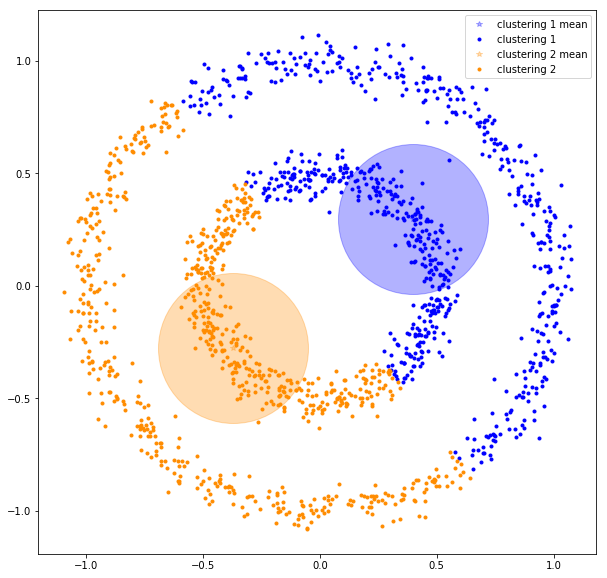

In [158]:
# E-step
# w = len(data)*k
# c = len(data)*k (1 mean belong to this clustering)

w = np.matmul(data_source**2, np.ones((x_dims, k))) \
    + np.matmul(np.ones((data_len,x_dims)), (u**2).T) \
    - 2*np.dot(data_source, u.T)

c = np.zeros(w.shape)
c[np.arange(w.shape[0]),np.argmin(w, axis=1)] = 1

showClustering(data_source, c, u)

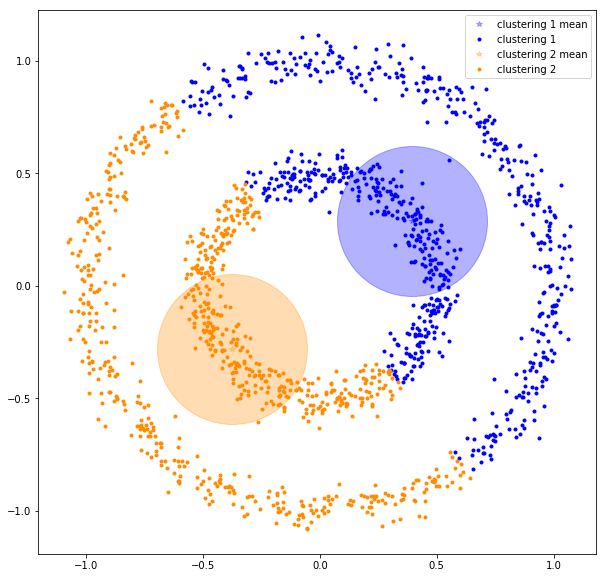

In [159]:
# M-step
# update u = k*x_dims

u_update = np.matmul(c.T, data_source) / np.sum(c, axis=0)[:,None]

u = u_update

showClustering(data_source, c, u_update)

### kernel K-means

### spectral clustering